
.. redirect-from:: /tutorials/provisional/mosaic
.. redirect-from:: /gallery/subplots_axes_and_figures/mosaic


# Complex and semantic figure composition (subplot_mosaic)

Laying out Axes in a Figure in a non-uniform grid can be both tedious
and verbose.  For dense, even grids we have `.Figure.subplots` but for
more complex layouts, such as Axes that span multiple columns / rows
of the layout or leave some areas of the Figure blank, you can use
`.gridspec.GridSpec` (see `arranging_axes`) or
manually place your axes.  `.Figure.subplot_mosaic` aims to provide an
interface to visually lay out your axes (as either ASCII art or nested
lists) to streamline this process.

This interface naturally supports naming your axes.
`.Figure.subplot_mosaic` returns a dictionary keyed on the
labels used to lay out the Figure.  By returning data structures with
names, it is easier to write plotting code that is independent of the
Figure layout.


This is inspired by a [proposed MEP](https://github.com/matplotlib/matplotlib/pull/4384)_ and the
[patchwork](https://github.com/thomasp85/patchwork)_ library for R.
While we do not implement the operator overloading style, we do
provide a Pythonic API for specifying (nested) Axes layouts.


In [39]:
import numpy as np
import pandas as pd
from matplotlib import font_manager
import matplotlib.pyplot as plt

# List available font families
print(font_manager.get_font_names())
'Source Serif Pro'
'Source Sans Pro'


['Segoe MDL2 Assets', 'Yu Gothic', 'cmsy10', 'TeX Gyre Heros', 'Cambria', 'Mongolian Baiti', 'Roboto', 'STIXSizeOneSym', 'TeX Gyre Cursor', 'Georgia', 'TeX Gyre Pagella', 'cmmi10', 'Noto Serif', 'Tahoma', 'Constantia', 'Gadugi', 'STIXSizeFourSym', 'Candara', 'HoloLens MDL2 Assets', 'Leelawadee UI', 'Segoe UI Emoji', 'Microsoft Tai Le', 'cmex10', 'Impact', 'Palatino Linotype', 'TeX Gyre Adventor', 'Source Sans Pro', 'Javanese Text', 'Sitka Small', 'STIXGeneral', 'cmss10', 'Lucida Sans Unicode', 'SimSun-ExtB', 'DejaVu Sans Display', 'SimSun', 'Malgun Gothic', 'Lucida Console', 'Consolas', 'Marlett', 'Microsoft Yi Baiti', 'TeX Gyre Bonum', 'Nirmala UI', 'Myanmar Text', 'TeX Gyre Chorus', 'Open Sans', 'Segoe UI', 'Bahnschrift', 'Source Serif Pro', 'Microsoft Himalaya', 'cmtt10', 'DejaVu Serif Display', 'Verdana', 'MingLiU-ExtB', 'Fira Sans', 'Arial', 'Trebuchet MS', 'MS Gothic', 'cmr10', 'Courier New', 'Microsoft Sans Serif', 'TeX Gyre Schola', 'STIXSizeThreeSym', 'Franklin Gothic Medium',

'Source Sans Pro'

In [40]:
test_test: str = "wcorr: -0.754\n$P_i$: 0.052\npearsonr: -0.76"

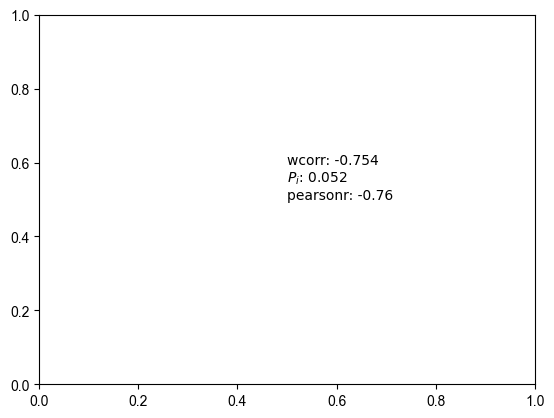

In [16]:
# Set a different font family
font = font_manager.FontProperties(family='DejaVu Sans')
at = plt.axes().annotate(test_test, xy=(0.5, 0.5), xycoords='axes fraction',
                         fontproperties=font)




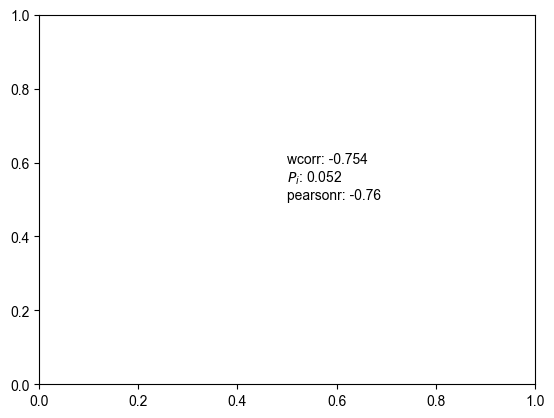

In [17]:
import matplotlib.pyplot as plt

# Set a system font (e.g., Arial)
plt.rcParams['font.family'] = 'Arial'

at = plt.axes().annotate(test_test, xy=(0.5, 0.5), xycoords='axes fraction')

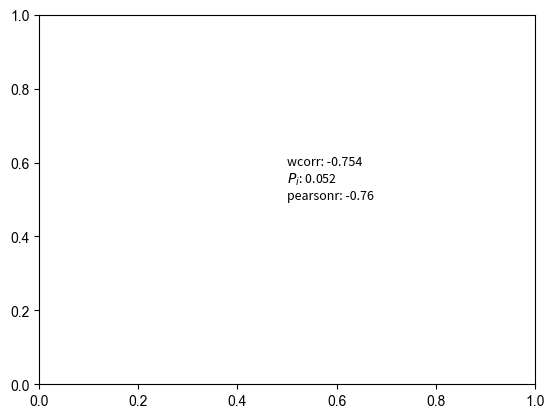

In [18]:
# font_prop = font_manager.FontProperties(family='DejaVu Sans',
#                               size=10,
#                             #   weight='bold',
#                             #   style='italic',
#                               )

'Source Serif Pro'
font_prop = font_manager.FontProperties(family='Source Sans Pro', # 'Source Code Pro'
                              size=10,
                            #   weight='bold',
                            #   style='italic',
                              )


at = plt.axes().annotate(test_test, xy=(0.5, 0.5), xycoords='axes fraction', fontproperties=font_prop)

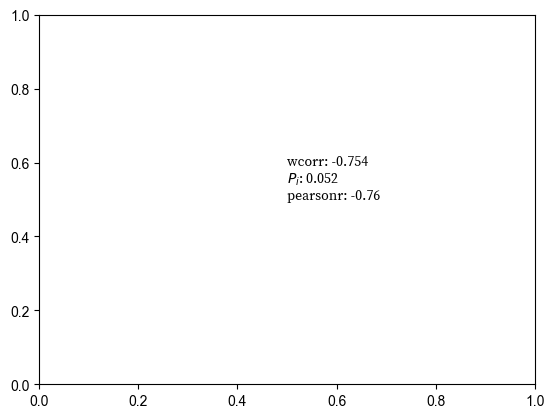

In [19]:
font_prop = font_manager.FontProperties(family='Source Serif Pro', # 'Source Code Pro'
                              size=10,
                            #   weight='bold',
                            #   style='italic',
                              )


at = plt.axes().annotate(test_test, xy=(0.5, 0.5), xycoords='axes fraction', fontproperties=font_prop)

In [11]:
plt.rcParams['legend.title_fontsize']

In [42]:
import colorsys

# def value_to_color(value):
#     """
#     Maps a value between -1.0 and 1.0 to an RGB color code.
#     """
#     norm = (value + 1) / 2  # Normalize the value to the range [0, 1]
#     rgb = colorsys.hsv_to_rgb(norm * 0.67, 1.0, 1.0)  # Convert to RGB
#     return '#{:02x}{:02x}{:02x}'.format(int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))

def value_to_color(value):
    """
    Maps a value between -1.0 and 1.0 to an RGB color code.
    -1.0 maps to bright blue, 0.0 maps to dark gray, and 1.0 maps to bright red.
    """
    if value <= 0:
        # Map values from -1.0 to 0.0 to shades of blue
        norm = (value + 1) / 2  # Normalize to [0, 1] range
        rgb = colorsys.hsv_to_rgb(0.67, 1.0, 1.0 - norm)  # Blue to dark gray
    else:
        # Map values from 0.0 to 1.0 to shades of red
        norm = value  # No need to normalize
        rgb = colorsys.hsv_to_rgb(0.0, 1.0, 1.0 - norm)  # Dark gray to red

    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))



# def add_inner_title(ax, title, loc, value, strokewidth=3, stroke_foreground='w', stroke_alpha=0.9, font_size=None, text_alpha=1.0, **kwargs):
#     """
#     Add a figure title inside the border of the figure (instead of outside).
#     The title text color is determined by the provided float value between -1.0 and 1.0.
#     """
#     import matplotlib.pyplot as plt
#     from matplotlib.offsetbox import AnchoredText
#     from matplotlib.patheffects import withStroke

#     # Color mapping function
#     def value_to_color(value):
#         norm = (value + 1) / 2
#         rgb = colorsys.hsv_to_rgb(norm * 0.67, 1.0, 1.0)
#         return '#{:02x}{:02x}{:02x}'.format(int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))

#     text_pop_key_name_list = ('horizontalalignment', 'verticalalignment', 'multialignment', 'rotation')
#     text_prop_kwargs = kwargs.pop('text_prop_kwargs', {})
#     text_prop_kwargs.update(
#         path_effects=[withStroke(foreground=stroke_foreground, linewidth=strokewidth, alpha=stroke_alpha)],
#         size=(font_size or plt.rcParams['legend.title_fontsize']),
#         color=value_to_color(value),  # Use the color mapping function
#         **{k: kwargs.pop(k) for k in text_pop_key_name_list if k in kwargs}
#     )

#     at = AnchoredText(title, loc=loc, prop=text_prop_kwargs, pad=0., borderpad=0.5, frameon=False, **kwargs)
#     ax.add_artist(at)

#     if text_alpha < 1.0:
#         at.txt._text.set_alpha(text_alpha)

#     return at


# Multi-color Labels _________________________________________________________________________________________________ #

import re
import matplotlib.font_manager as fm
from matplotlib.text import TextPath

def add_inner_title(ax, title, loc, strokewidth=3, stroke_foreground='w', stroke_alpha=0.9, font_size=None, text_alpha=1.0, **kwargs):
    """
    Add a figure title inside the border of the figure (instead of outside).
    The numeric values in the title text are color-coded based on their values between -1.0 and 1.0.
    The labels preceding the numeric values are rendered in dark gray.
    """
    import matplotlib.pyplot as plt
    from matplotlib.offsetbox import AnchoredText
    from matplotlib.patheffects import withStroke

    def value_to_color(value):
        """
        Maps a value between -1.0 and 1.0 to an RGB color code.
        -1.0 maps to bright blue, 0.0 maps to dark gray, and 1.0 maps to bright red.
        """
        if value <= 0:
            norm = (value + 1) / 2
            rgb = colorsys.hsv_to_rgb(0.67, 1.0, 1.0 - norm)
        else:
            norm = value
            rgb = colorsys.hsv_to_rgb(0.0, 1.0, 1.0 - norm)

        return '#{:02x}{:02x}{:02x}'.format(int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))

    text_pop_key_name_list = ('horizontalalignment', 'verticalalignment', 'multialignment', 'rotation')
    text_prop_kwargs = kwargs.pop('text_prop_kwargs', {})

    # Parse the input string and color-code the numeric values
    colored_text = []
    for part in re.split(r'([\d\.-]+)', title):
        if part.replace('.', '').replace('-', '').isdigit():
            value = float(part)
            color = value_to_color(value)
            font_prop = fm.FontProperties(color=color, **text_prop_kwargs.get('fontproperties', {}))
            colored_text.append(TextPath((0, 0), part, size=text_prop_kwargs.get('size', None), prop=font_prop))
        else:
            colored_text.append(part)

    text_prop_kwargs.update(
        path_effects=[withStroke(foreground=stroke_foreground, linewidth=strokewidth, alpha=stroke_alpha)],
        size=(font_size or plt.rcParams['legend.title_fontsize']),
        color='#404040',  # Dark gray color for labels
        **{k: kwargs.pop(k) for k in text_pop_key_name_list if k in kwargs}
    )

    at = AnchoredText(colored_text, loc=loc, prop=text_prop_kwargs, pad=0., borderpad=0.5, frameon=False, **kwargs)
    ax.add_artist(at)

    if text_alpha < 1.0:
        at.txt._text.set_alpha(text_alpha)

    return at

TypeError: __init__() got an unexpected keyword argument 'color'

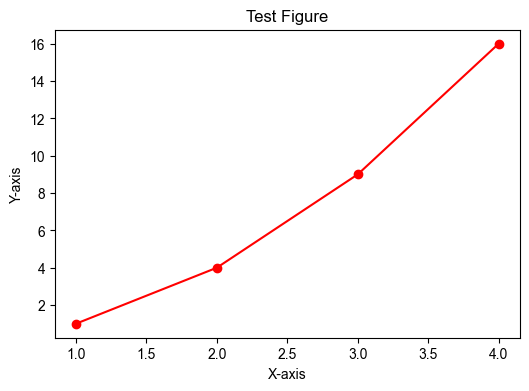

In [43]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro-')
ax.set_title('Test Figure')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Add a color-coded title with a float value
float_value = -0.9
title_text = f"{float_value:.2f}"
add_inner_title(ax, title_text, loc=2, value=float_value)

plt.show()

In [33]:
test_str = "wcorr: -0.754\n$P_i$: 0.052\npearsonr: -0.76"
add_inner_title(ax, test_str, loc=2)

TypeError: __init__() got an unexpected keyword argument 'color'